In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [10]:
x,y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, random_state=42)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
train_scores , test_scores = [], []

In [13]:
values = [i for i in range(1, 21)]
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    train_yhat = model.predict(x_train)
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print(f"max_depth: {i} train acc: {train_acc} test acc: {test_acc}")
      

max_depth: 1 train acc: 0.87 test acc: 0.87
max_depth: 2 train acc: 0.87875 test acc: 0.88
max_depth: 3 train acc: 0.91875 test acc: 0.895
max_depth: 4 train acc: 0.94125 test acc: 0.89
max_depth: 5 train acc: 0.95625 test acc: 0.88
max_depth: 6 train acc: 0.975 test acc: 0.875
max_depth: 7 train acc: 0.98875 test acc: 0.86
max_depth: 8 train acc: 0.995 test acc: 0.86
max_depth: 9 train acc: 0.9975 test acc: 0.865
max_depth: 10 train acc: 0.99875 test acc: 0.86
max_depth: 11 train acc: 0.99875 test acc: 0.86
max_depth: 12 train acc: 1.0 test acc: 0.865
max_depth: 13 train acc: 1.0 test acc: 0.85
max_depth: 14 train acc: 1.0 test acc: 0.865
max_depth: 15 train acc: 1.0 test acc: 0.865
max_depth: 16 train acc: 1.0 test acc: 0.855
max_depth: 17 train acc: 1.0 test acc: 0.86
max_depth: 18 train acc: 1.0 test acc: 0.86
max_depth: 19 train acc: 1.0 test acc: 0.86
max_depth: 20 train acc: 1.0 test acc: 0.86


C:\Users\Cheru\AppData\Local\Temp\ipykernel_18352\3800001160.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(values, test_scores, '-o' ,label='Test Accuracy' , linestyle='--')


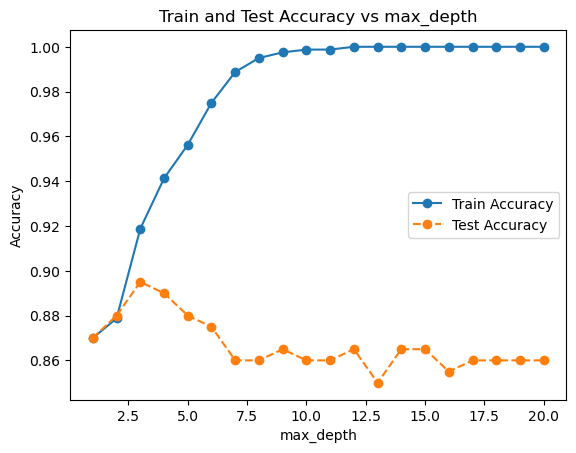

In [19]:
plt.plot(values, train_scores,'-o',  label='Train Accuracy')
plt.plot(values, test_scores, '-o' ,label='Test Accuracy' , linestyle='--')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs max_depth')
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import  GridSearchCV

In [23]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [ 2, 4, 6, 10, 20], 'min_samples_split': [ 5,10, 20,50,100]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='accuracy',n_jobs= -1)# cv=5 means 5-fold cross-validation
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [24]:
print(grid_search.best_params_)  # Best hyperparameters based on cross-validation


{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}


In [25]:
print(accuracy_score(y_train ,grid_search.best_estimator_.predict(x_train))) # Train accuracy
print(accuracy_score(y_test ,grid_search.best_estimator_.predict(x_test))) # Test accuracy

0.945
0.895
